# Comparison of different algorithms

In this task you will neeed to implement Damped Newton method and compare them on the proposed problem.

Please, comment on the results.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Number of iterations: 500
Number of iterations: 61
Number of iterations: 20


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Number of iterations: 500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: UserWarning: The following kwargs were not used by contour: 'label'


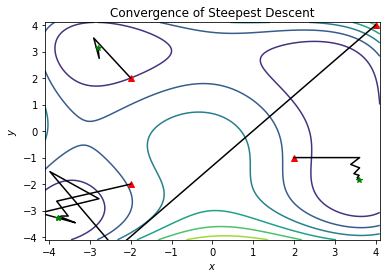

Number of iterations: 8
Number of iterations: 12
Number of iterations: 9
Number of iterations: 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: UserWarning: The following kwargs were not used by contour: 'label'


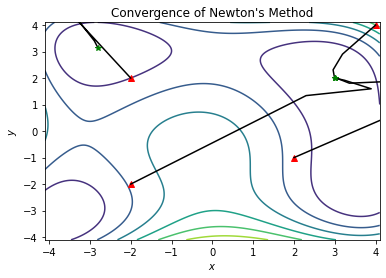

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: UserWarning: The following kwargs were not used by contour: 'label'


Number of iterations: 63
Number of iterations: 65
Number of iterations: 64
Number of iterations: 64


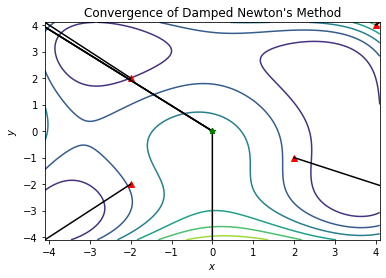

In [18]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo
import numpy.linalg as la

def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
    
def grad_f(x):
    return np.array([2*(2*x[0]*(x[0]**2+x[1]-11)+x[0]+x[1]**2-7),2*(x[0]**2+2*x[1]*(x[0]+x[1]**2-7)+x[1]-11)])
    	
def Hess_f(x):
    return np.array([[-42 + 12*x[0]**2 + 4*x[1], 4*(x[0] + x[1])],[4*(x[0] + x[1]),-26 + 4*x[0] + 12*x[1]**2]])

def steep(x):
    s = -1*grad_f(x)
    return getAlpha(f,grad_f,x,s)*s

def newton(x):
    return la.solve(Hess_f(x),-grad_f(x))

def dampNewton(x):
    ###
    ### YOUR CODE
    ###
    return x
    
def getAlpha(f,grad_f,x,s):
    alpha = spo.line_search(f,grad_f,x,s)[0]
    if alpha is None:
        alpha = 1
    return alpha

def get_iterates(method,starter,maxit=500,tol=1e-16):
    x = np.array(starter)
    iterates = x
    dx = method(x)
    while la.norm(dx)/la.norm(x) >= tol:
        x = x + dx
        iterates = np.row_stack((iterates,x))
        dx = method(x)
        if len(iterates) == maxit:
            break
    print(f"Number of iterations: {len(iterates)}")
    return np.transpose(iterates), x
    
starters = [[4, 4],[2,-1],[-2,2],[-2,-2]]
plot_bound = 4.1
methods, methodnames = [steep,newton,dampNewton],["Steepest Descent","Newton's Method","Damped Newton's Method"]
    
for method in methods:
    for starter in starters:
        iterates, final = get_iterates(method,starter)
        plt.plot(starter[0],starter[1],'r^',label='start point')
        plt.plot(iterates[0],iterates[1],'k-',label='path taken')
        plt.plot(final[0],final[1],'g*',label='terminal point')
        # plt.legend()

    xmesh, ymesh = np.meshgrid(np.linspace(-plot_bound,plot_bound,801),np.linspace(-plot_bound,plot_bound,801))
    fmesh = f((xmesh, ymesh))
    plt.axis([-plot_bound,plot_bound,-plot_bound,plot_bound])
    plt.title(f"Convergence of {methodnames[methods.index(method)]}")
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.contour(xmesh, ymesh, fmesh,label='f(x)')
    fig = plt.gcf()
    plt.savefig('p3afig'+str(methods.index(method)+1)+'.png',dpi=200)
    plt.show()